In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [8]:
# Loading the dataset
data = pd.read_csv('C:/Users/shaje/OneDrive/Documents/NCL Internship/5_2023_113.csv')

In [9]:
data.head()

,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,egr_error,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude
0,6463297,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-05-27 19:39:23,0.0,0.0
1,6463296,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-05-27 19:39:21,0.0,0.0
2,6463295,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-05-27 19:39:18,0.0,0.0
3,6463294,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-05-27 19:39:16,0.0,0.0
4,6463293,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-05-27 19:39:14,0.0,0.0


In [10]:
data.shape

(44252, 41)

In [11]:
data.isnull().sum()

bulk_id                                     0
car_reg_no                                  0
vehicle_speed                               0
heading                                     0
distance                                44252
altitude                                    0
o_s1_b1_voltage                         44252
o_s2_b2_voltage                          1327
o_s1_current                             1333
calculated_engine_load                   1335
engine_rpm                               1348
spark_advance                            1358
absolute_load_value                      1368
throttle_position                        1368
relative_throttle_position               1370
absolute_throttle_position               1375
ap_pos_d                                 1391
ap_pos_e                                 1406
commanded_exhaust_gas_recirculation     44252
commanded_evaporative_purge              1408
commanded_throttle_actuator             44252
fuel_rail_pressure                

In [6]:
data.describe

<bound method NDFrame.describe of        bulk_id  car_reg_no  vehicle_speed  heading  distance  altitude  \
0      6463297         113            0.0      0.0       NaN       0.0   
1      6463296         113            0.0      0.0       NaN       0.0   
2      6463295         113            0.0      0.0       NaN       0.0   
3      6463294         113            0.0      0.0       NaN       0.0   
4      6463293         113            0.0      0.0       NaN       0.0   
...        ...         ...            ...      ...       ...       ...   
44247  6418980         113           40.0      0.0       NaN     -11.1   
44248  6418979         113           40.0      0.0       NaN     -11.1   
44249  6418978         113           41.0      0.0       NaN     -11.1   
44250  6418977         113            0.0      0.0       NaN       0.0   
44251  6418976         113            0.0      0.0       NaN       0.0   

       o_s1_b1_voltage  o_s2_b2_voltage  o_s1_current  calculated_engine_load

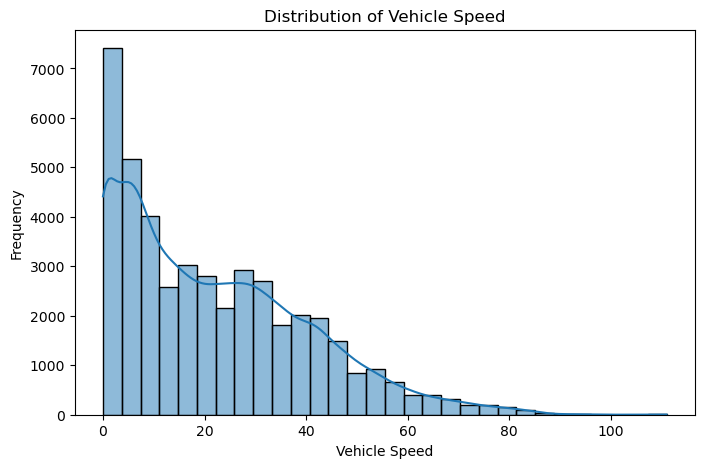

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable (vehicle_speed)
plt.figure(figsize=(8, 5))
sns.histplot(data['vehicle_speed'], kde=True, bins=30)
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

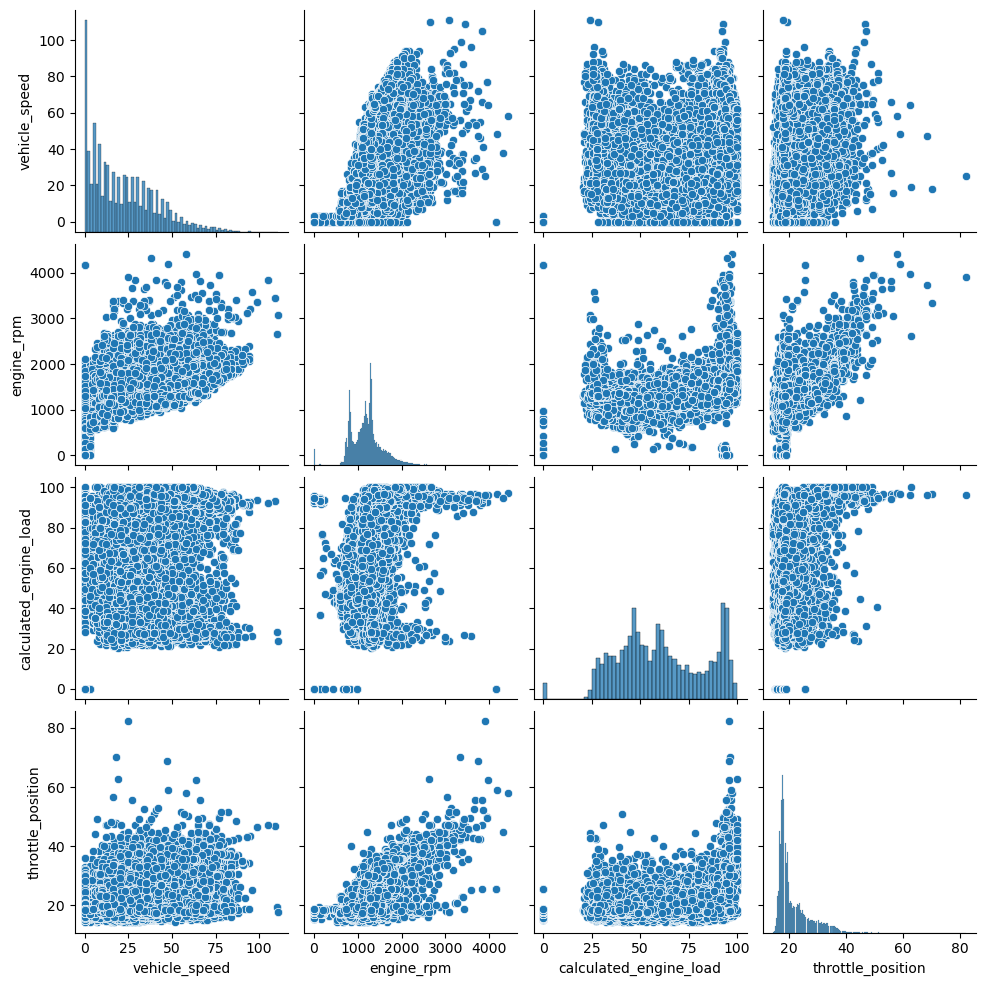

In [23]:
# Pairplot of selected features and target
selected_features = ['vehicle_speed', 'engine_rpm', 'calculated_engine_load', 'throttle_position']
sns.pairplot(data[selected_features])
plt.show()

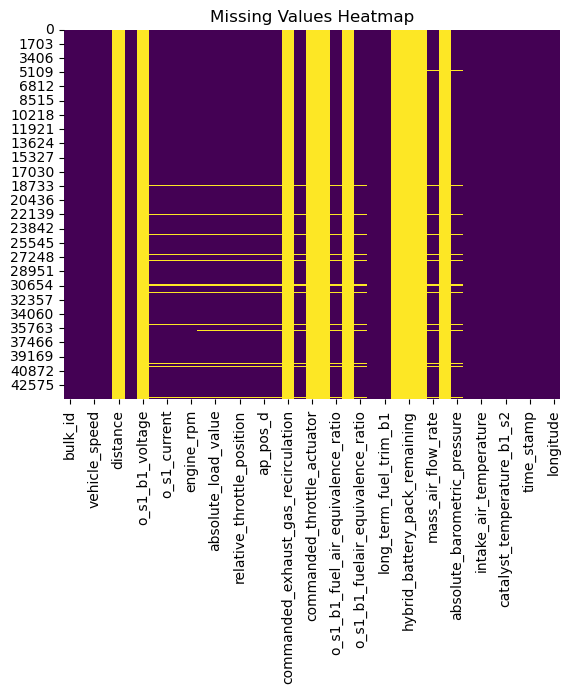

In [24]:
# Missing values heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

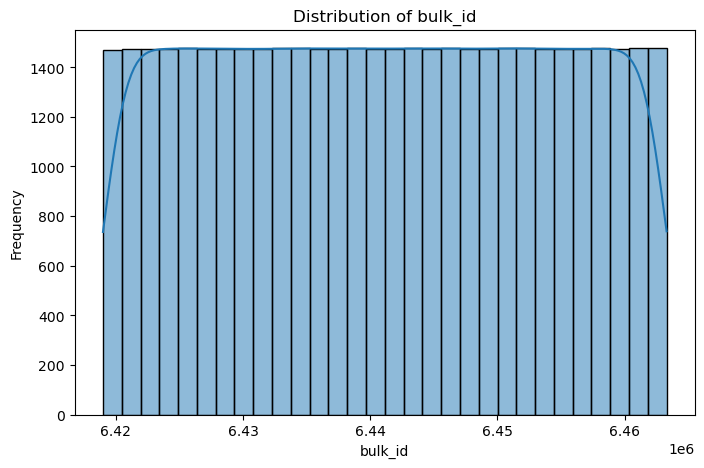

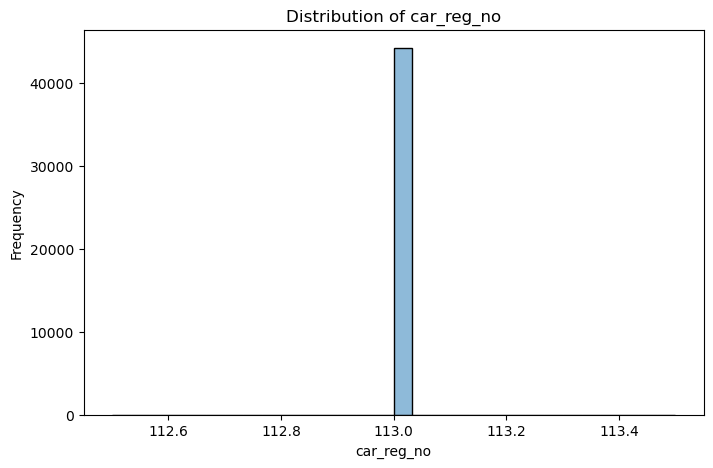

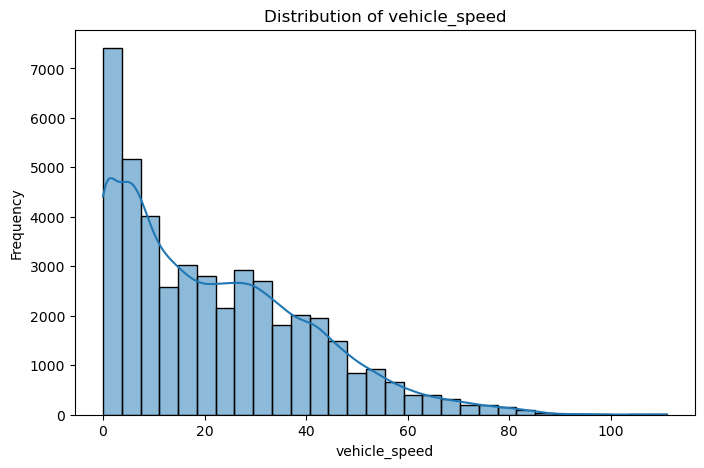

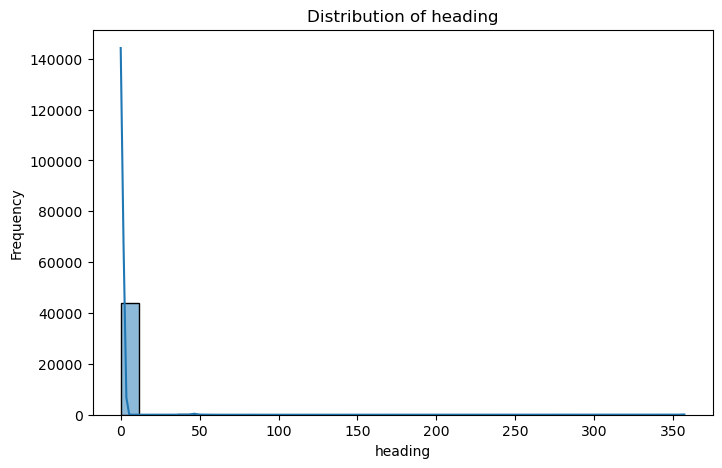

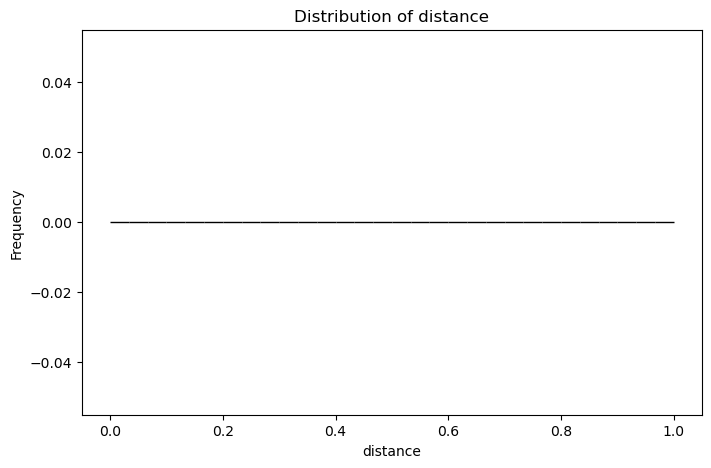

In [25]:
# Plot distributions for key numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns[:5]:  # Adjust to include all columns or select top N
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

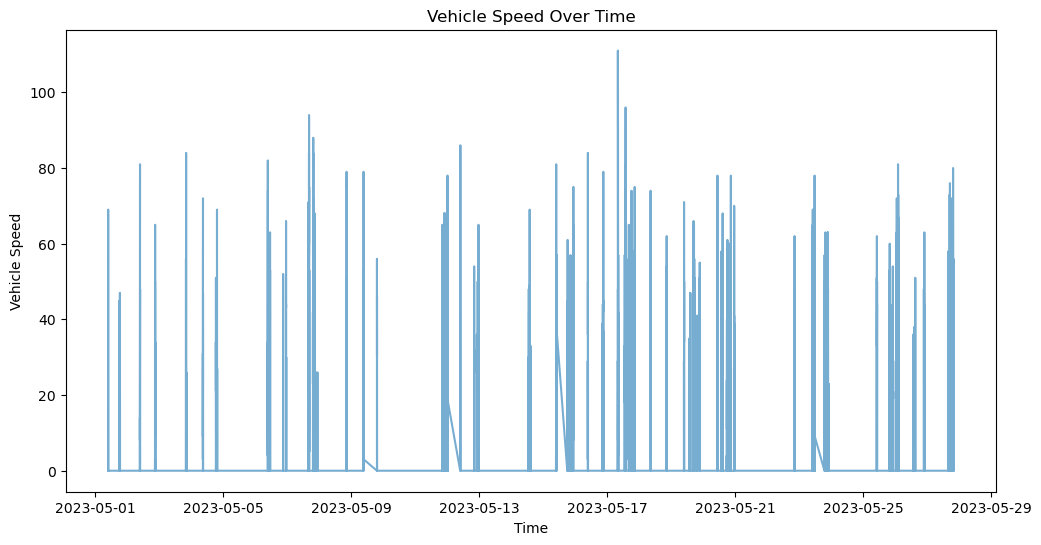

In [26]:
# Converting time_stamp to datetime if not done already
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

# Visualizing vehicle_speed over time
plt.figure(figsize=(12, 6))
plt.plot(data['time_stamp'], data['vehicle_speed'], alpha=0.6)
plt.title('Vehicle Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Vehicle Speed')
plt.show()

In [12]:
# Drop irrelevant or fully null columns
columns_to_drop = [
    'distance', 'o_s1_b1_voltage', 'commanded_exhaust_gas_recirculation', 
    'commanded_throttle_actuator', 'fuel_rail_pressure', 'fuel_tank_level_input',
    'fuel_air_commanded_equivalence_ratio', 'hybrid_battery_pack_remaining',
    'intake_manifold_absolute_pressure', 'egr_error', 'catalyst_temperature_b1_s1',
    'catalyst_temperature_b1_s2'
]
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

In [14]:
# Impute missing values with column means
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_columns] = imputer.fit_transform(data_cleaned[numerical_columns])

In [15]:
# Convert time_stamp to datetime
data_cleaned['time_stamp'] = pd.to_datetime(data_cleaned['time_stamp'])

In [16]:
# Confirm data cleaning
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44252 entries, 0 to 44251
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   bulk_id                             44252 non-null  float64       
 1   car_reg_no                          44252 non-null  float64       
 2   vehicle_speed                       44252 non-null  float64       
 3   heading                             44252 non-null  float64       
 4   altitude                            44252 non-null  float64       
 5   o_s2_b2_voltage                     44252 non-null  float64       
 6   o_s1_current                        44252 non-null  float64       
 7   calculated_engine_load              44252 non-null  float64       
 8   engine_rpm                          44252 non-null  float64       
 9   spark_advance                       44252 non-null  float64       
 10  absolute_load_value   

In [17]:
# Define features (X) and target (y)
X = data_cleaned.drop(columns=['vehicle_speed', 'time_stamp'])  # Features
y = data_cleaned['vehicle_speed']  # Target

In [18]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
# Predictions
y_pred_train = linear_model.predict(X_train_scaled)
y_pred_test = linear_model.predict(X_test_scaled)

In [29]:
# Evaluate Linear Regression
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [30]:
print(f"Linear Regression - Train RMSE: {rmse_train}, Test RMSE: {rmse_test}")
print(f"Linear Regression - Train R²: {r2_train}, Test R²: {r2_test}")

Linear Regression - Train RMSE: 12.369888611087303, Test RMSE: 12.520656681911897
Linear Regression - Train R²: 0.5516516164008649, Test R²: 0.5509615419093824


In [31]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Predictions
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

In [33]:
# Evaluate Random Forest
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

In [34]:
print(f"Random Forest - Train RMSE: {rmse_train_rf}, Test RMSE: {rmse_test_rf}")
print(f"Random Forest - Train R²: {r2_train_rf}, Test R²: {r2_test_rf}")

Random Forest - Train RMSE: 2.8597830808493434, Test RMSE: 7.768936505871801
Random Forest - Train R²: 0.9760365018741604, Test R²: 0.8271169294263208


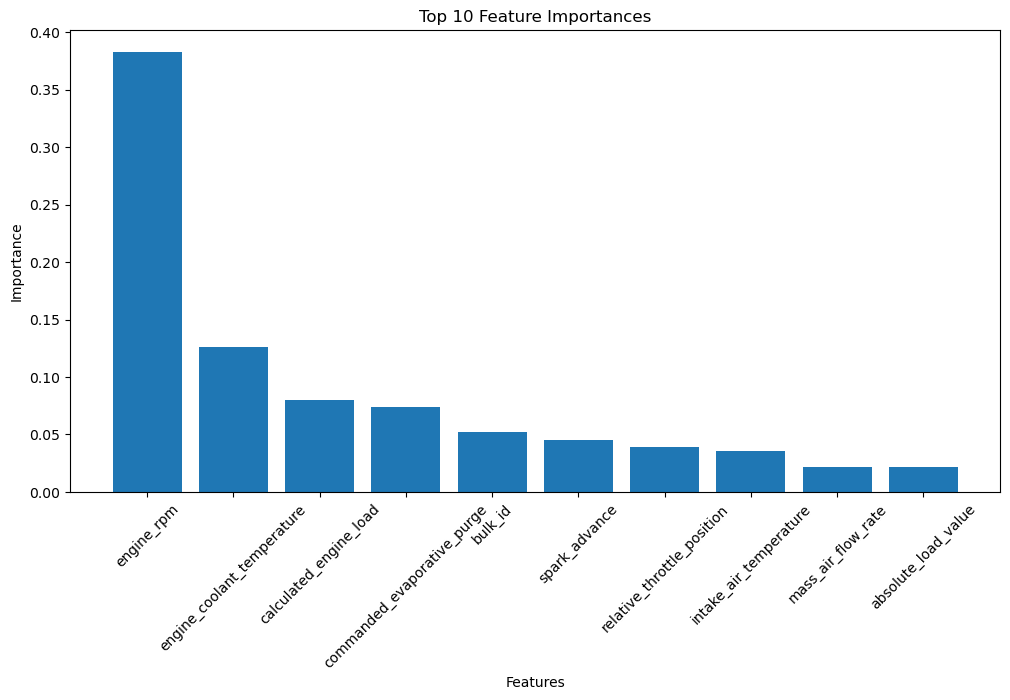

In [35]:
# Feature Importance
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]

# Plot Top 10 Features
plt.figure(figsize=(12, 6))
plt.bar(sorted_features[:10], feature_importances[sorted_indices[:10]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.xticks(rotation=45)
plt.show()

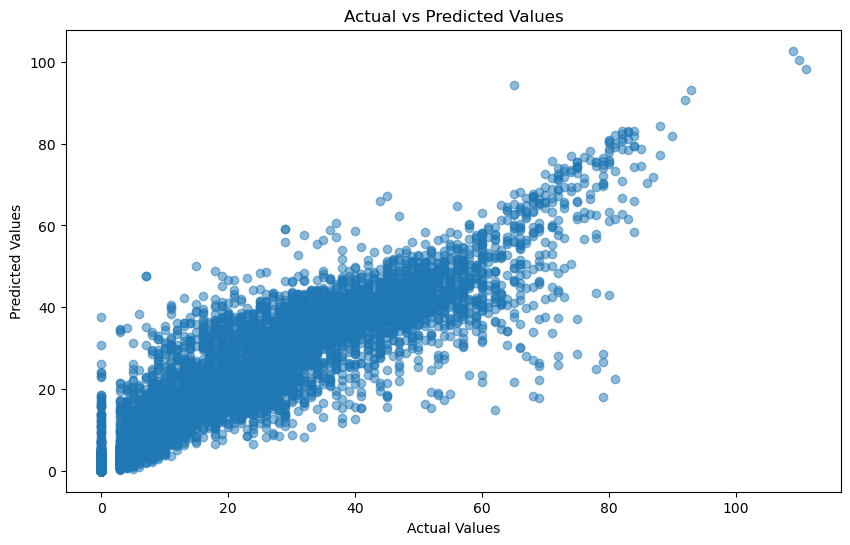

In [36]:
# Actual vs Predicted for the Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_rf, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()